In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import pandas as pd
import random

# Define categories
job_titles = ['Data Scientist', 'Software Engineer', 'Product Manager', 'DevOps Engineer', 'Business Analyst']
locations = ['New York', 'San Francisco', 'Chicago', 'Austin', 'Seattle']
industries = ['Technology', 'Finance', 'Healthcare', 'Education', 'Retail']
descriptions = [
    'Experience with Python, SQL, and machine learning algorithms.',
    'Responsible for developing and maintaining backend systems.',
    'Oversee product lifecycle and collaborate with cross-functional teams.',
    'Maintain CI/CD pipelines and manage cloud infrastructure.',
    'Analyze business data to support strategic decisions.'
]

# Generate synthetic dataset
data = []
for _ in range(200):
    job = random.choice(job_titles)
    location = random.choice(locations)
    company_size = random.randint(50, 10000)
    experience = random.randint(0, 10)
    industry = random.choice(industries)
    description = random.choice(descriptions)
    base_salary = {
        'Data Scientist': 110000,
        'Software Engineer': 105000,
        'Product Manager': 115000,
        'DevOps Engineer': 108000,
        'Business Analyst': 95000
    }[job]
    salary = base_salary + experience * 2000 + random.randint(-5000, 5000)
    data.append([job, location, company_size, experience, industry, description, salary])

# Create DataFrame and save
df = pd.DataFrame(data, columns=[
    'job_title', 'location', 'company_size', 'experience_required',
    'industry', 'job_description', 'salary'
])
df.to_csv("job_listings.csv", index=False)
print("Dataset saved as 'job_listings.csv'")


Dataset saved as 'job_listings.csv'


In [5]:
# Load dataset
df = pd.read_csv("job_listings.csv")

# Drop rows with missing target
df = df.dropna(subset=['salary'])

# Basic cleaning: fill or drop missing values
df = df.fillna({
    'experience_required': df['experience_required'].median(),
    'company_size': df['company_size'].median(),
    'location': 'Unknown',
    'industry': 'Unknown',
    'job_description': ''
})


In [7]:
X = df[['job_title', 'location', 'company_size', 'experience_required', 'industry', 'job_description']]
y = df['salary']


In [9]:
numerical_features = ['company_size', 'experience_required']
categorical_features = ['job_title', 'location', 'industry']
text_features = 'job_description'


In [11]:
# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Preprocessing for text data
text_transformer = TfidfVectorizer(max_features=300)

# Combine all preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('text', text_transformer, text_features)
    ]
)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
linear_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
linear_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['company_size',
                                                   'experience_required']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job_title', 'location',
                                                   'industry']),
                                                 ('text',
                                                  TfidfVectorizer(max_features=300),
                                                  'job_description')])),
                ('regressor', LinearRegression())])

In [17]:
ridge_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

ridge_params = {'regressor__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
ridge_grid = GridSearchCV(ridge_model, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['company_size',
                                                                          'experience_required']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['job_title',
                                                                          'location',
                                                                          'industry']),
                                                                        ('text',
                                                                         TfidfVectorizer(max_features=300),
                                                                         'job_description')])),
                                       ('regressor', Ridge())]),
             param_grid={'regressor__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]},
             scoring='neg_mean_squared_error')

In [19]:
lasso_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(max_iter=10000))
])

lasso_params = {'regressor__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
lasso_grid = GridSearchCV(lasso_model, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)


C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4901551.781567931, tolerance: 1095041.7092875
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28931218.111098766, tolerance: 1074913.5984
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5649933.487898946, tolerance: 1047315.626121875
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: Conver

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['company_size',
                                                                          'experience_required']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['job_title',
                                                                          'location',
                                                                          'industry']),
                                                                        ('text',
                                                                         TfidfVectorizer(max_features=300),
                                                                         'job_description')])),
                                       ('regressor', Lasso(max_iter=10000))]),
             param_grid={'regressor__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]},
             scoring='neg_mean_squared_error')

In [21]:
models = {
    "Linear Regression": linear_model,
    "Ridge Regression": ridge_grid.best_estimator_,
    "Lasso Regression": lasso_grid.best_estimator_
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
    print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")



Linear Regression
R² Score: 0.8980
RMSE: 3023.36

Ridge Regression
R² Score: 0.8986
RMSE: 3015.26

Lasso Regression
R² Score: 0.9055
RMSE: 2909.88


C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


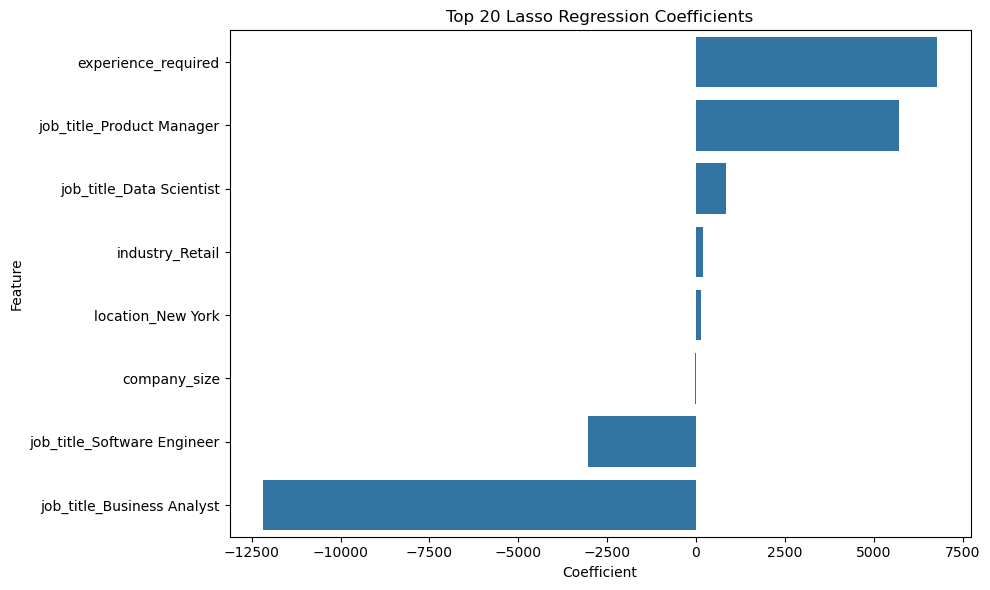

In [23]:
# Extract feature names after preprocessing
lasso_best = lasso_grid.best_estimator_
feature_names = (
    list(preprocessor.named_transformers_['num'].get_feature_names_out(numerical_features)) +
    list(preprocessor.named_transformers_['cat'].get_feature_names_out()) +
    list(preprocessor.named_transformers_['text'].get_feature_names_out())
)
coefficients = lasso_best.named_steps['regressor'].coef_

# Create DataFrame of coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df[coef_df['Coefficient'] != 0]  # Only non-zero for Lasso
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df.head(20), x='Coefficient', y='Feature')
plt.title('Top 20 Lasso Regression Coefficients')
plt.tight_layout()
plt.show()
